<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

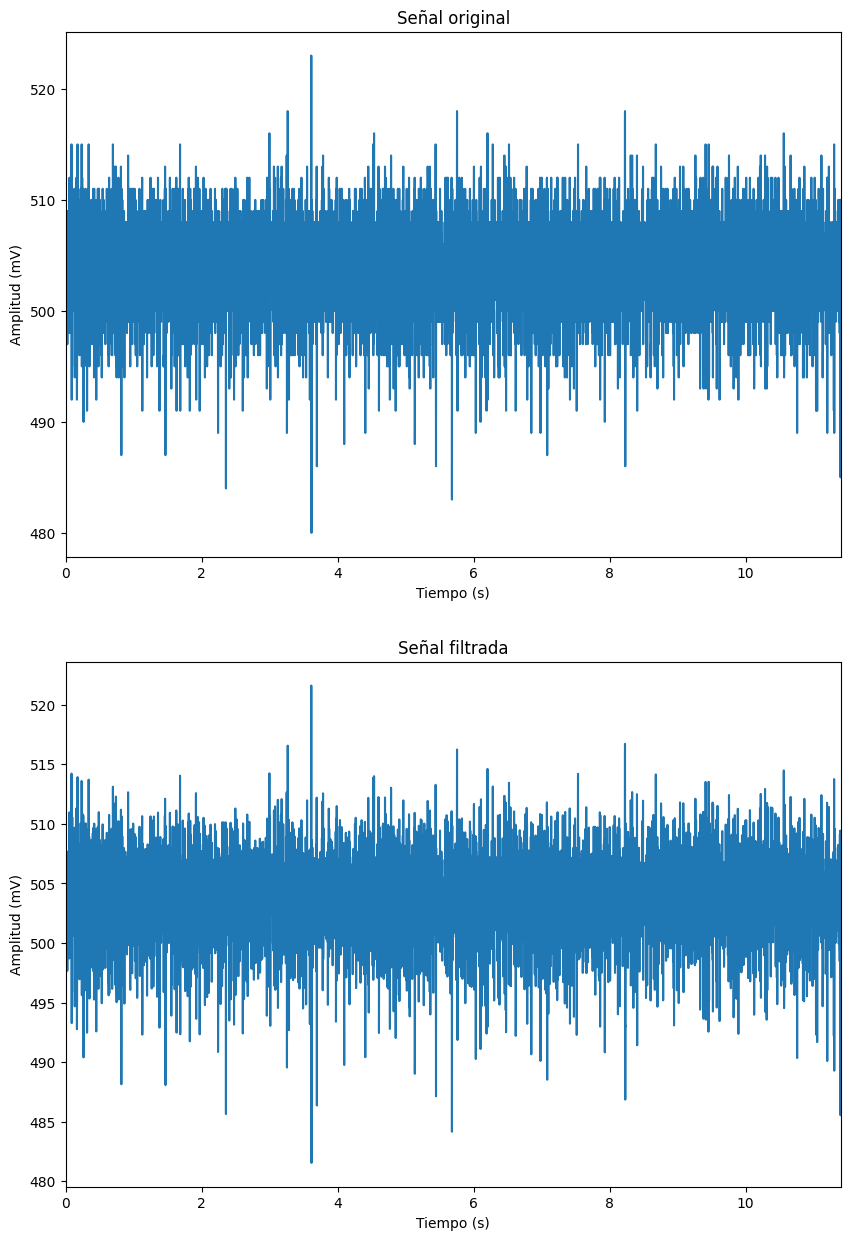

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks

# Cargar el archivo de texto, omitiendo las primeras 8 líneas de texto
data = np.loadtxt('adrian_Reposo.txt', skiprows=6, usecols=5)

frecuencia_muestreo = 1000  # Hz
num_muestras = len(data)
tiempo_final = (num_muestras-1) / frecuencia_muestreo  # Tiempo total de la señal
tiempo = np.linspace(0, tiempo_final, num_muestras)

# Aplicar la transformada wavelet
coeffs = pywt.wavedec(data, 'db6', level=4)

# Filtrar los coeficientes
threshold = 0.742
filtered_coeffs = [pywt.threshold(coeff, threshold, mode='soft') for coeff in coeffs]

# Reconstruir la señal filtrada
filtered_signal = pywt.waverec(filtered_coeffs, 'db6')
filtered_signal = filtered_signal[0:len(filtered_signal)-1]

# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 1)
plt.plot(tiempo, data)
plt.title('Señal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.xlim(tiempo[0], tiempo[-1])

plt.subplot(2, 1, 2)
plt.plot(tiempo,filtered_signal)
plt.title('Señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.xlim(tiempo[0], tiempo[-1])

plt.tight_layout